In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Example 1: Speration of two gaussian blobs

In [2]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

In [3]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
print("Shape of Inputs:", inputs.shape)

Shape of Inputs: (2000, 2)


In [4]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))
print("Shape of Targets:", targets.shape)

Shape of Targets: (2000, 1)


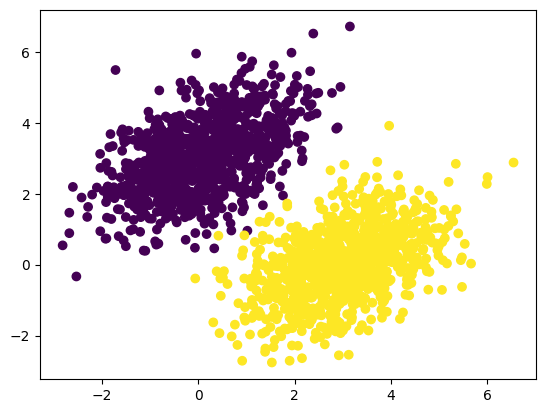

In [5]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [6]:
input_dim = 2 
output_dim = 1

W = np.random.randn(input_dim, output_dim)
b = np.random.randn(1, output_dim)

params = [W, b]

### Forward Propagation
Number of hidden layers: 0 <br>
Activation Function: Linear <br>
<br>
$\hat{y} = XW + b$

In [7]:
def forward(inputs, params):
    W, b = params
    y_hat = np.dot(inputs, W) + b
    
    return y_hat

### Backward Propagation

#### Loss Function: MSE (Mean Squared Error)

$L = \dfrac{1}{N}\sum(y - \hat{y})^2$ <br>

#### Gradients

$ \dfrac{\partial L}{\partial \hat{y}} = -\dfrac{2}{N}(y - \hat{y}) $ <br><br>
$ \dfrac{\partial L}{\partial W} = X^T \dfrac{\partial L}{\partial \hat{y}}$ <br><br>
$ \dfrac{\partial L}{\partial b} = \sum\dfrac{\partial L}{\partial \hat{y}}$ <br>

### Gradient Descent

$ W_{t} = W_{t-1} - \alpha \dfrac{\partial L}{\partial W} $ <br><br>
$ b_{t} = b_{t-1} - \alpha \dfrac{\partial L}{\partial b} $

In [8]:
def backward(targets, cache):
    N = targets.shape[0]
    y_hat = cache['y_hat']
    inputs = cache['inputs']
    loss = np.mean(np.square(targets - y_hat))
    
    d_y_hat = -2*(targets-y_hat)/N
    d_W = np.dot(inputs.T, d_y_hat)
    d_b = np.sum(d_y_hat, axis=0, keepdims=True)
    
    grads = [d_W, d_b]
    
    return loss, grads

In [9]:
lr = 0.1

for epoch in range(40):
    y_hat = forward(inputs, params)
    
    cache = {
    "y_hat": y_hat,
    "inputs": inputs
    }
    
    loss, grads = backward(targets, cache)
    print(f"Epoch {epoch:3}: {loss}")
    
    
    # Gradient Descent
    d_W, d_b = grads
    W = W - lr*d_W
    b = b - lr*d_b
    
    params = [W, b]

Epoch   0: 8.106547363669026
Epoch   1: 1.2825346279132264
Epoch   2: 0.4568132734391455
Epoch   3: 0.30834041141709373
Epoch   4: 0.26711133156839406
Epoch   5: 0.2441217267852732
Epoch   6: 0.2253666505153306
Epoch   7: 0.2085456916076436
Epoch   8: 0.1931932047527779
Epoch   9: 0.179138601705895
Epoch  10: 0.1662655270824261
Epoch  11: 0.15447361837693477
Epoch  12: 0.14367191074248967
Epoch  13: 0.1337772289348911
Epoch  14: 0.124713405531485
Epoch  15: 0.11641067257466949
Epoch  16: 0.1088051211038832
Epoch  17: 0.10183820869093195
Epoch  18: 0.09545630873616745
Epoch  19: 0.0896102976740176
Epoch  20: 0.08425517685084902
Epoch  21: 0.07934972615533849
Epoch  22: 0.0748561867337846
Epoch  23: 0.07073997034788972
Epoch  24: 0.06696939313780917
Epoch  25: 0.06351543174114951
Epoch  26: 0.0603514998906835
Epoch  27: 0.05745324377118127
Epoch  28: 0.05479835456015262
Epoch  29: 0.05236639670956526
Epoch  30: 0.05013865064676746
Epoch  31: 0.048097968683832704
Epoch  32: 0.046228643026

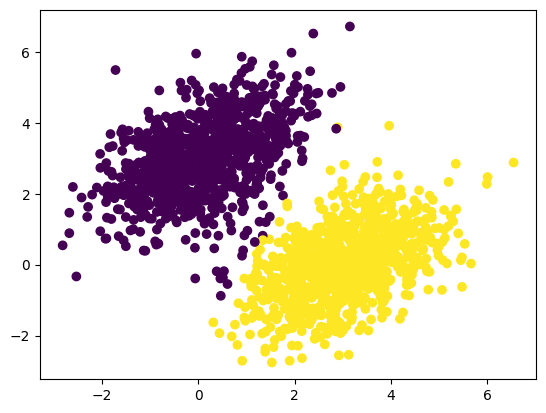

In [10]:
predictions = forward(inputs, params)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

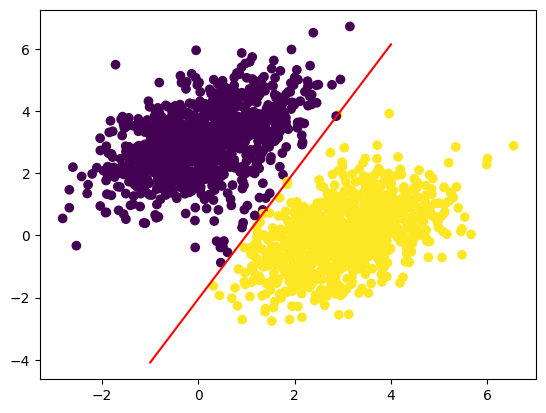

In [11]:
x0 = np.linspace(-1, 4, 100)
x1 = - W[0] / W[1] * x0 + (0.5 - b[0]) / W[1]
plt.plot(x0, x1, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

# Example 2: Separation of inner and outer circles